In [13]:
import networkx as nx
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
nx.__version__

'2.5'

In [74]:
path="./data/soc-sign-bitcoinotc.csv"
data=pd.read_csv(path)

data["TIME"]=data.TIME.apply(lambda x: datetime.fromtimestamp(x))
data.shape

(35592, 4)

In [100]:
DG = nx.DiGraph()
liste = [(i,j,1000*k) for (i,j,k) in zip(data['SOURCE'], data['TARGET'], data['RATING'])]
DG.add_weighted_edges_from(liste[:1000])

In [101]:
CD = nx.degree_centrality(DG) # centralité degré
#nx.in_degree_centrality(G)
#nx.out_degree_centrality(G)

VCP = nx.eigenvector_centrality(DG) # centralité vecteur propre

CP = nx.closeness_centrality(DG) # centralité proximité

CI = nx.betweenness_centrality(DG)  # centralité intermédiarité

## Centralitée de degrée

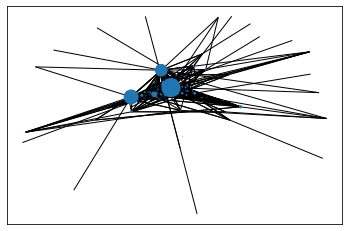

In [102]:
CD = nx.degree_centrality(DG)
size = [3000*x**3 for x in CD.values()]
nx.draw_networkx(DG, node_size=size, with_labels=False, arrowsize=1, arrows=False)

In [103]:
CD_DF=pd.DataFrame.from_dict(CD,orient='index',columns=['Degree_Centrality'])

In [106]:
UpperMeanCD=CD_DF[CD_DF.Degree_Centrality>CD_DF.Degree_Centrality.median()*2]

In [107]:
print(UpperMeanCD.sort_values(by="Degree_Centrality",ascending=False))
print(CD_DF.Degree_Centrality.mean())

     Degree_Centrality
7             0.477273
60            0.401515
1             0.356061
41            0.193182
132           0.185606
202           0.174242
104           0.125000
2             0.121212
149           0.121212
29            0.117424
64            0.106061
39            0.102273
143           0.094697
110           0.094697
206           0.090909
4             0.090909
21            0.079545
144           0.071970
35            0.071970
135           0.068182
6             0.068182
141           0.064394
113           0.064394
23            0.064394
166           0.064394
142           0.060606
78            0.060606
13            0.060606
62            0.056818
77            0.056818
81            0.053030
54            0.053030
69            0.053030
100           0.053030
17            0.053030
114           0.049242
75            0.049242
221           0.049242
80            0.049242
36            0.045455
219           0.041667
171           0.041667
212        

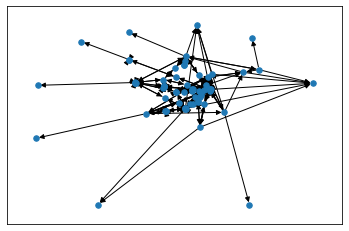

In [55]:
nx.draw_networkx(DG, with_labels=False, node_size=30)

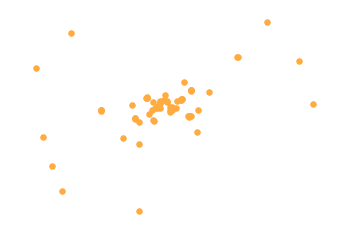

In [63]:

def plot_weighted_graph(G, node_size=30, edge_size=2.0, title="", save_name=None):
    "Plot a weighted graph"
    
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_color='#ffab40',node_size=node_size)
    
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = (weight*len(G.nodes())*edge_size/sum(all_weights))**(1.2)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width,edge_color="white")
 
    #Plot the graph
    plt.axis('off')
    plt.title(title)
    if save_name is not None:
        plt.savefig(save_name, dpi=300)
    plt.show() 
    
plot_weighted_graph(DG, save_name="graph_pres.png")

In [75]:
def draw_communaute(G, with_labels=False, node_size=30):
    
    # extraction des communauté
    communities_generator = nx.algorithms.community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    communities = sorted(map(sorted, next_level_communities))

    # mise dans un dico
    communaute = {}
    j = 0
    for i in communities:
        communaute[j] = i
        j += 1

    # dico des couleurs    
    C = len(communities)
    liste_couleur = {}
    for i in range(C):
        liste_couleur[i] = (1,i/(C-1),0) # couleur RGB (a,b,c) valeur de a,b,c entre 0 et 1

    # map nodes - couleur
    couleur_node = {}
    for j in communaute:
        for i in communaute[j]:
            couleur_node[i] = liste_couleur[j]   

    # lsite finale pour l'argument node_color de nx.draw_networkx
    liste_couleur_node = []
    for i in DG.nodes():
        liste_couleur_node.append(couleur_node[i])
    
    nx.draw_networkx(DG, with_labels=with_labels, node_size=node_size, node_color = liste_couleur_node)
    plt.axis('off')

    draw_communaute(DG)

72

In [10]:
def importGraph(path):
    edgelist=/home/pierre/Documents/School/M2/GraphMagistere/data/benign-csvs
    G = nx.Graph(edgelist)
    return G

SyntaxError: invalid syntax (<ipython-input-10-6fc96b79b1c5>, line 2)